In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('SAT_GPA.csv')
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
95,1934,3.54
96,1861,3.58
97,1931,3.58
98,1933,3.59


In [3]:
df.shape

(100, 2)

In [4]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [5]:
df.tail()

,SAT,GPA
95,1934,3.54
96,1861,3.58
97,1931,3.58
98,1933,3.59
99,1778,3.59


In [6]:
df.isna().sum()

SAT    0
GPA    0
dtype: int64

In [7]:
df.columns

Index(['SAT', 'GPA'], dtype='object')

In [8]:
df.dtypes

SAT      int64
GPA    float64
dtype: object

In [9]:
x=df.iloc[:,:-1]
x

,SAT
0,1714
1,1664
2,1760
3,1685
4,1693
...,...
95,1934
96,1861
97,1931
98,1933


In [10]:
y=df.iloc[:,-1]
y

0     2.40
1     2.52
2     2.54
3     2.74
4     2.83
      ... 
95    3.54
96    3.58
97    3.58
98    3.59
99    3.59
Name: GPA, Length: 100, dtype: float64

Text(0.5, 1.0, 'SAT-GPA')

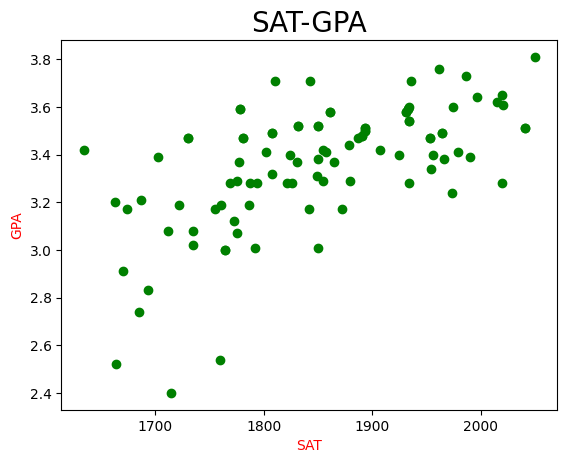

In [11]:
plt.scatter(x,y,color='g')
plt.xlabel('SAT',color='r',fontsize=10)
plt.ylabel('GPA',color='r',fontsize=10)
plt.title('SAT-GPA',color='k',fontsize=20)


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

,SAT
67,1934
99,1778
54,1879
95,1934
88,1964
...,...
75,2015
9,1850
72,1975
12,1735


In [13]:
x_test

,SAT
80,1810
84,1730
33,1855
81,1987
93,1832
17,1674
36,1808
82,1962
69,1931
65,1832


In [14]:
y_train

67    3.54
99    3.59
54    3.44
95    3.54
88    3.49
      ... 
75    3.62
9     3.01
72    3.60
12    3.08
37    3.34
Name: GPA, Length: 70, dtype: float64

In [15]:
y_test

80    3.71
84    3.47
33    3.29
81    3.73
93    3.52
17    3.17
36    3.32
82    3.76
69    3.58
65    3.52
92    3.51
39    3.37
56    3.47
52    3.42
51    3.42
32    3.29
31    3.28
44    3.39
78    3.71
10    3.02
2     2.54
73    3.60
97    3.58
62    3.50
19    3.19
35    3.31
94    3.52
27    3.28
46    3.40
38    3.37
Name: GPA, dtype: float64

In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


array([3.27149455, 3.14491222, 3.34269711, 3.55155795, 3.30630469,
       3.05630459, 3.26832999, 3.51200097, 3.46295032, 3.30630469,
       3.40282371, 3.30472241, 3.14491222, 3.42497562, 3.34269711,
       3.21611478, 3.46769716, 3.55630479, 3.32370976, 3.15282361,
       3.19238059, 3.46769716, 3.46295032, 3.40282371, 3.23351985,
       3.33320343, 3.33478571, 3.28889962, 3.29364645, 3.21927934])

In [17]:
y_test

80    3.71
84    3.47
33    3.29
81    3.73
93    3.52
17    3.17
36    3.32
82    3.76
69    3.58
65    3.52
92    3.51
39    3.37
56    3.47
52    3.42
51    3.42
32    3.29
31    3.28
44    3.39
78    3.71
10    3.02
2     2.54
73    3.60
97    3.58
62    3.50
19    3.19
35    3.31
94    3.52
27    3.28
46    3.40
38    3.37
Name: GPA, dtype: float64

In [18]:
print(model.predict([[1714]]))

[3.11959575]


c:\Users\Haritha V R\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


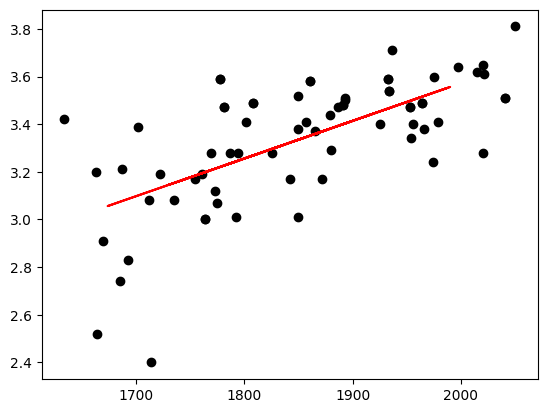

In [19]:
plt.scatter(x_train,y_train,color='k')
plt.plot(x_test,y_pred,color='r')

In [20]:
print(model.predict([[1670]]))

[3.04997547]


c:\Users\Haritha V R\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
print('slope is',model.coef_)

slope is [0.00158228]


In [22]:
print('constant is',model.intercept_)

constant is 0.40756933990756394


In [23]:
df1=pd.DataFrame({'actual value':y_test,'predicted value':y_pred,'diff':y_test-y_pred})
df1

,actual value,predicted value,diff
80,3.71,3.271495,0.438505
84,3.47,3.144912,0.325088
33,3.29,3.342697,-0.052697
81,3.73,3.551558,0.178442
93,3.52,3.306305,0.213695
17,3.17,3.056305,0.113695
36,3.32,3.268330,0.051670
82,3.76,3.512001,0.247999
69,3.58,3.462950,0.117050
65,3.52,3.306305,0.213695


In [24]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score
MAE=mean_absolute_error(y_test,y_pred)
MAPE=mean_absolute_percentage_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=root_mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
MAE



0.16653930452509721

In [25]:
MAPE




0.04992566728343503

In [26]:
MSE

0.04714836401963341

In [27]:
RMSE

0.21713674037258968

In [28]:
score

0.14785953165951604

In [29]:
#mape=0.04,score=.14 not good model

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)
x_train_poly
x_test_poly

array([[1.00000000e+00, 1.81000000e+03, 3.27610000e+06, 5.92974100e+09],
       [1.00000000e+00, 1.73000000e+03, 2.99290000e+06, 5.17771700e+09],
       [1.00000000e+00, 1.85500000e+03, 3.44102500e+06, 6.38310138e+09],
       [1.00000000e+00, 1.98700000e+03, 3.94816900e+06, 7.84501180e+09],
       [1.00000000e+00, 1.83200000e+03, 3.35622400e+06, 6.14860237e+09],
       [1.00000000e+00, 1.67400000e+03, 2.80227600e+06, 4.69101002e+09],
       [1.00000000e+00, 1.80800000e+03, 3.26886400e+06, 5.91010611e+09],
       [1.00000000e+00, 1.96200000e+03, 3.84944400e+06, 7.55260913e+09],
       [1.00000000e+00, 1.93100000e+03, 3.72876100e+06, 7.20023749e+09],
       [1.00000000e+00, 1.83200000e+03, 3.35622400e+06, 6.14860237e+09],
       [1.00000000e+00, 1.89300000e+03, 3.58344900e+06, 6.78346896e+09],
       [1.00000000e+00, 1.83100000e+03, 3.35256100e+06, 6.13853919e+09],
       [1.00000000e+00, 1.73000000e+03, 2.99290000e+06, 5.17771700e+09],
       [1.00000000e+00, 1.90700000e+03, 3.63664900e